# Handwritten Digit Recognition Project using CNN and ML Algorithms

## 📥 1. Import Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## 📂 2. Load and Preprocess the Data

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [25]:
X = train.drop(columns=['label'])
y = train['label']

In [26]:
X = X / 255.0
test = test / 255.0

## 📊 3. Visualize Some Sample Images

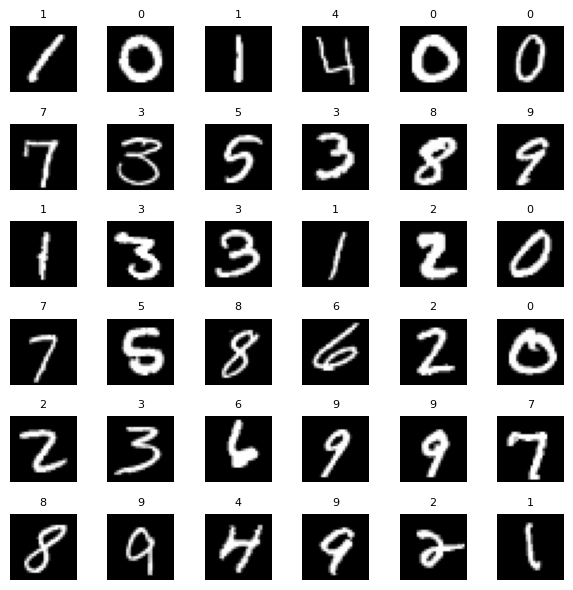

In [27]:
plt.figure(figsize=(6, 6))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    img = X.iloc[i].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"{y.iloc[i]}", fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
X = train.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y = train['label'].values
X = X / 255.0

test = test.values.reshape(-1, 28, 28, 1)
test = test / 255.0

## 🎯4. Train-Test Split

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔁 5. Data Augmentation

In [30]:
gen = ImageDataGenerator(rotation_range=10,
                         zoom_range=0.1,
                         width_shift_range=0.1,
                         height_shift_range=0.1)

## 🧠 6. CNN Model Definition

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

def create_model():
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

## 🚅 7. Model Training with Callbacks

In [32]:
gen = ImageDataGenerator(rotation_range=10,
                         zoom_range=0.1,
                         width_shift_range=0.1,
                         height_shift_range=0.1)

model = create_model()
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-5)

history = model.fit(gen.flow(X_train, y_train, batch_size=128),
                    validation_data=(X_val, y_val),
                    epochs=30,
                    callbacks=[early_stop, lr_reduce],
                    verbose=2)

Epoch 1/30
263/263 - 16s - 60ms/step - accuracy: 0.8831 - loss: 0.3698 - val_accuracy: 0.1968 - val_loss: 2.7723 - learning_rate: 0.0010
Epoch 2/30
263/263 - 12s - 45ms/step - accuracy: 0.9569 - loss: 0.1399 - val_accuracy: 0.9725 - val_loss: 0.0980 - learning_rate: 0.0010
Epoch 3/30
263/263 - 12s - 44ms/step - accuracy: 0.9677 - loss: 0.1078 - val_accuracy: 0.9888 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 4/30
263/263 - 12s - 45ms/step - accuracy: 0.9722 - loss: 0.0909 - val_accuracy: 0.9883 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 5/30
263/263 - 12s - 45ms/step - accuracy: 0.9754 - loss: 0.0800 - val_accuracy: 0.9888 - val_loss: 0.0393 - learning_rate: 0.0010
Epoch 6/30
263/263 - 12s - 45ms/step - accuracy: 0.9786 - loss: 0.0729 - val_accuracy: 0.9913 - val_loss: 0.0274 - learning_rate: 0.0010
Epoch 7/30
263/263 - 12s - 45ms/step - accuracy: 0.9807 - loss: 0.0652 - val_accuracy: 0.9923 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 8/30
263/263 - 12s - 45ms/step - ac

## 📈 8. Training and Validation Graphs

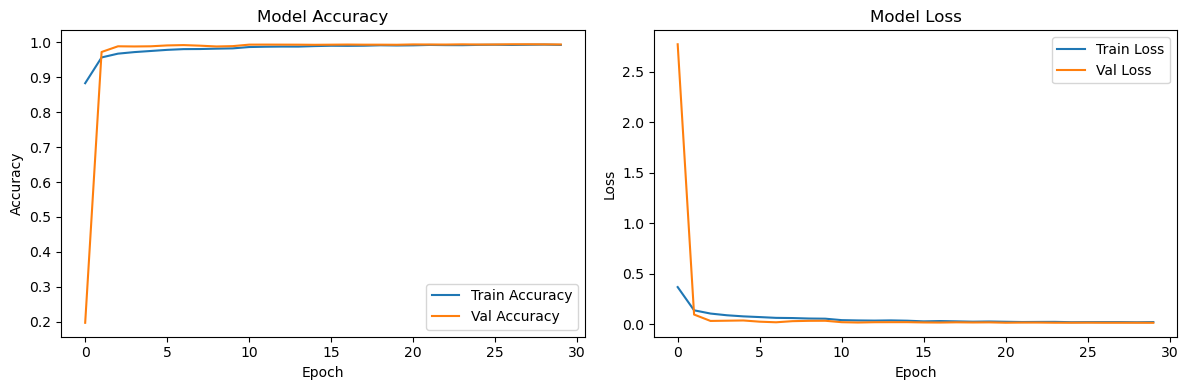

In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## 📊 9. Confusion Matrix

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


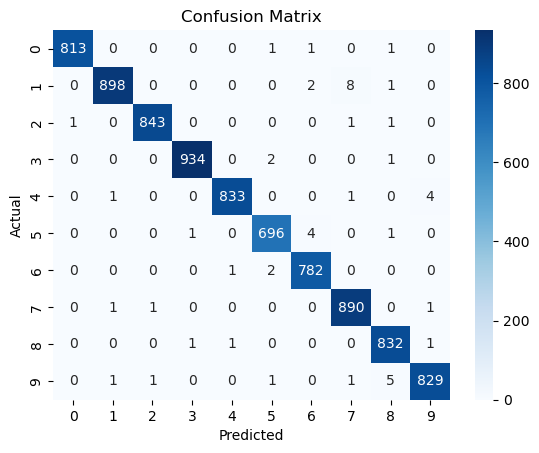

In [34]:
y_pred = model.predict(X_val).argmax(axis=1)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## ❌ 10. Visualize Misclassified Images

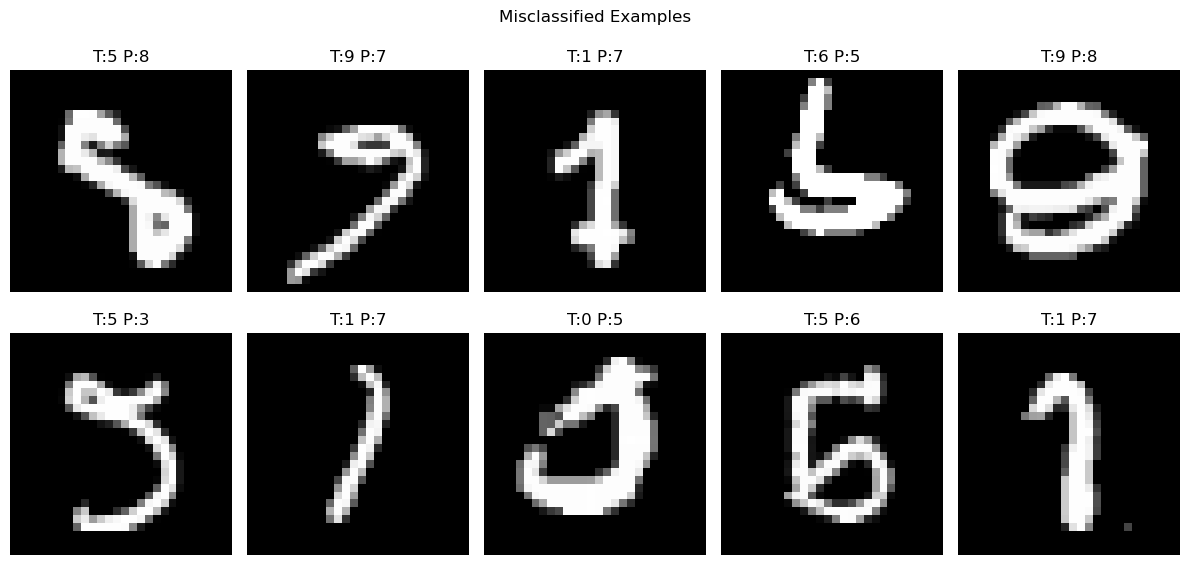

In [45]:
misclassified = np.where(y_pred != y_val)[0]
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_val[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_val[idx]} P:{y_pred[idx]}")
    plt.axis('off')
plt.suptitle('Misclassified Examples')
plt.tight_layout()
plt.show()


## 🧪 11. Classical Models (SVM & RF)

In [46]:
# Fix here
X_flat = X.reshape(-1, 28*28)
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_flat, y, test_size=0.2, random_state=42)

In [47]:
scaler=StandardScaler()

In [48]:
X_train_f = scaler.fit_transform(X_train_f)
X_val_f = scaler.transform(X_val_f)

In [49]:
# SVM
svm_model = SVC()
svm_model.fit(X_train_f, y_train_f)
svm_preds = svm_model.predict(X_val_f)
print("SVM Accuracy:", accuracy_score(y_val_f, svm_preds))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_f, y_train_f)
rf_preds = rf_model.predict(X_val_f)
print("Random Forest Accuracy:", accuracy_score(y_val_f, rf_preds))

SVM Accuracy: 0.9586904761904762
Random Forest Accuracy: 0.9632142857142857


## 🧬 12. Ensemble Voting (CNN + SVM + RF)

In [50]:
cnn_preds = model.predict(X_val).argmax(axis=1)
ensemble_preds = []

for i in range(len(cnn_preds)):
    preds = [cnn_preds[i], svm_preds[i], rf_preds[i]]
    ensemble_preds.append(max(set(preds), key=preds.count))

print("Ensemble Accuracy:", accuracy_score(y_val_f, ensemble_preds))

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Ensemble Accuracy: 0.9795238095238096


## Conclusion

### In this project, an ensemble learning approach was implemented by combining predictions from a Convolutional Neural Network
### (CNN), Support Vector Machine (SVM), and Random Forest (RF) models to improve classification accuracy. 
### The ensemble method leveraged the strengths of individual models by selecting the most frequent prediction among them
### for each validation sample. This strategy resulted in a high ensemble accuracy of approximately 97.95%, 
### demonstrating the robustness and effectiveness of combining diverse machine learning algorithms.
### The successful integration of deep learning and traditional machine learning models highlights the power of ensemble 
### techniques in enhancing predictive performance, making this approach suitable for complex classification tasks.